In [1]:
!pwd

/home/resham/sahi-with-yolox/sahi-yolox


In [2]:
import yolox

In [3]:
from sahi.model import YoloXDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

In [4]:
config_file_template = '''

#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Copyright (c) Megvii, Inc. and its affiliates.

import os

from yolox.exp import Exp as MyExp


class Exp(MyExp):
    def __init__(self):
        super(Exp, self).__init__()
        self.depth = 0.67
        self.width = 0.75
        self.exp_name = os.path.split(os.path.realpath(__file__))[1].split(".")[0]
'''

with open('test_config.py', 'w') as f:
    f.write(config_file_template)


In [5]:
CLASSES = (
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "backpack",
    "umbrella",
    "handbag",
    "tie",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "dining table",
    "toilet",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
)

In [7]:
chkpt_file = "/home/resham/sahi-with-yolox/sahi-yolox/yolox_m.pth"
config_path = "test_config"

In [8]:
detection_model = YoloXDetectionModel(
    model_path=chkpt_file,
    config_path = config_path,
    device="cuda:0",
    confidence_threshold=0.3,
    nms_threshold=0.4,
    image_size = (640,640),
    classes=CLASSES
)

In [9]:
result = get_prediction("demo/demo_data/bev-car7.jpeg", detection_model)

/home/resham/.local/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


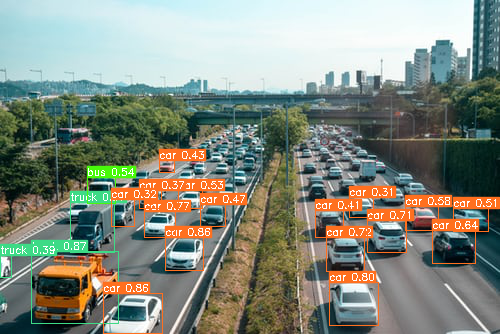

In [10]:
result.export_visuals(export_dir="demo/demo_data/")
Image("demo/demo_data/prediction_visual.png")

In [11]:
result = get_sliced_prediction(
    "demo/demo_data/bev-car7.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

Performing prediction on 6 number of slices.


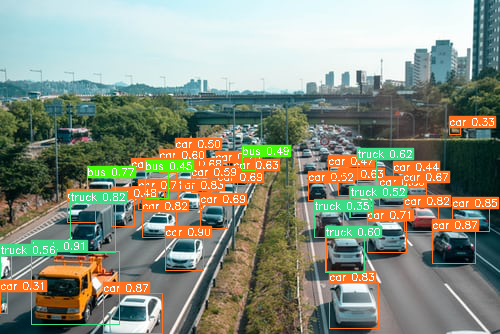

In [12]:
result.export_visuals(export_dir="demo/demo_data/")
Image("demo/demo_data/prediction_visual.png")